In [12]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/beyond-analysis/train.csv
/kaggle/input/beyond-analysis/sample_submission_random.csv
/kaggle/input/beyond-analysis/test.csv


In [13]:
data=pd.read_csv("/kaggle/input/beyond-analysis/train.csv")
data.head()

,UNIQUE_IDENTIFIER,SEQUENCE_NO,STATUS_CHECK,CATEGORY_1,CATEGORY_2,ACTIVE_YN,ENTRY,REVENUE,WINNINGS_1,WINNINGS_2,...,WITHDRAW_NUMBER,DEPOSIT_TRAILS,ENTRY_NUMBER,WINNINGS_NUMBER,PRACTICE_ENTRY,PRACTICE_WINNINGS,PRACTICE_ENTRY_NUMBER,PRACTICE_WINNINGS_NUMBER,Y1,Y2
0,98481267304,1,0,M,B,1,0.00000,0.000000,0.0000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.449287,101.369863
1,98481267304,2,0,M,B,1,0.13735,0.011550,0.0999,0.0,...,0.0,0.0,1.8,1.0,0.0,0.0,0.0,0.0,4.449287,101.369863
2,98481267304,3,0,M,B,1,0.15835,0.010425,0.0242,0.0,...,0.0,0.0,0.7,0.3,0.0,0.0,0.0,0.0,4.449287,101.369863
3,98481267304,4,0,M,B,1,0.44490,0.035850,0.2398,0.0,...,0.0,0.0,2.8,1.5,0.0,0.0,0.0,0.0,4.449287,101.369863
4,98481267304,5,0,M,B,1,0.00000,0.000000,0.0000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.449287,101.369863


In [14]:
X=data.iloc[:,:-2]
y=data.iloc[:,-2:]
X.shape,y.shape,data.shape

((1246837, 23), (1246837, 2), (1246837, 25))

In [15]:
# !pip install category_encoders
import category_encoders as ce

In [16]:
from sklearn.preprocessing import LabelEncoder

# encoder1= LabelEncoder()
# encoder2= LabelEncoder()
# data.iloc[:,3]=encoder1.fit_transform(data.iloc[:,3])
# data.iloc[:,4]=encoder2.fit_transform(data.iloc[:,4])
encoder = ce.BinaryEncoder(cols=["CATEGORY_1","CATEGORY_2"])
X=encoder.fit_transform(X)

/opt/conda/lib/python3.7/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [17]:
sum(X["CATEGORY_1_0"]),sum(X["CATEGORY_2_0"])
# CATEGORY_1_0 , 2_0 not useful so dropping 'em
X.drop(["CATEGORY_1_0","CATEGORY_2_0"],axis=1,inplace=True)

In [18]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X.iloc[:,1:], y, test_size=0.1, random_state=42)

In [19]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [20]:
X_train[0,:]

array([ 0.75687158, -0.8545976 , -0.08508293,  0.42519973, -0.45010791,
        1.30367663, -0.09273507,  2.3426259 , -1.85506078,  1.13291249,
        0.11548126, -0.18119709, -0.20913174, -0.16671081, -0.0495513 ,
       -0.203798  , -0.2229035 , -0.49671868, -0.12233141, -0.05404907,
       -0.10443715, -0.11507172, -0.53151885, -0.47198052, -0.06718907,
       -0.0576975 , -0.09137357, -0.08547676])

In [21]:
def mse(x,y,modely1,modely2):
    
    y1=modely1.predict(x)
    y2=modely2.predict(x)
    print(y1.shape,y.iloc[:,0].shape)
    mse1=np.sum((y.iloc[:,0]-y1)**2)
    mse2=np.sum((y.iloc[:,1]-y2)**2)
    print(mse1,mse2)
    return (mse1+mse2)/2
    

In [22]:
regr1 = RandomForestRegressor(max_depth=2,random_state=0)
regr1.fit(X_train, y_train.iloc[:,0])
regr2 = RandomForestRegressor(max_depth=2, random_state=0)
regr2.fit(X_train, y_train.iloc[:,1])

RandomForestRegressor(max_depth=2, random_state=0)

In [23]:
mse(X_train,y_train,regr1,regr2)

(1122153,) (1122153,)
125540855.10111631 44748784096.56841


22437162475.834766

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR


In [ ]:
gbreg1 = GradientBoostingRegressor(random_state=0)
gbreg2 = GradientBoostingRegressor(random_state=0)
gbreg1.fit(X_train, y_train.iloc[:,0])
gbreg2.fit(X_train, y_train.iloc[:,1])

In [ ]:
svr1=SVR(C=1.0, epsilon=0.2)
svr2=SVR(C=1.0, epsilon=0.2)
svr1.fit(X_train, y_train.iloc[:,0])
svr2.fit(X_train, y_train.iloc[:,1])

In [24]:
test=pd.read_csv("/kaggle/input/beyond-analysis/test.csv")

In [25]:
test.head()

,UNIQUE_IDENTIFIER,SEQUENCE_NO,STATUS_CHECK,CATEGORY_1,CATEGORY_2,ACTIVE_YN,ENTRY,REVENUE,WINNINGS_1,WINNINGS_2,...,DEPOSIT_2,WITHDRAW,WITHDRAW_NUMBER,DEPOSIT_TRAILS,ENTRY_NUMBER,WINNINGS_NUMBER,PRACTICE_ENTRY,PRACTICE_WINNINGS,PRACTICE_ENTRY_NUMBER,PRACTICE_WINNINGS_NUMBER
0,98481269471,1,0,M,D,1,5.975,0.90500,0.4100,0.0,...,1.0,0.0,0.0,9.8,1.4,0.2,0.0,0.0,0.0,0.0
1,98481269471,2,0,M,D,0,0.000,0.00000,0.0000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,98481270499,1,1,M,D,1,0.050,0.00750,0.0850,0.0,...,1.0,0.0,0.0,0.0,0.1,0.1,0.0,0.0,0.0,0.0
3,98481270499,2,1,M,D,1,1.750,0.26250,1.0200,0.0,...,0.0,0.0,0.0,0.0,3.5,1.2,0.0,0.0,0.0,0.0
4,98481272694,1,0,M,C,1,0.125,0.01875,0.0425,0.0,...,10.0,0.0,0.0,0.0,0.5,0.1,0.0,0.0,0.0,0.0


In [26]:
test.shape

(979059, 23)

In [27]:
test.drop_duplicates(inplace=True)

In [28]:
test=encoder.transform(test)
test.head()


,UNIQUE_IDENTIFIER,SEQUENCE_NO,STATUS_CHECK,CATEGORY_1_0,CATEGORY_1_1,CATEGORY_1_2,CATEGORY_1_3,CATEGORY_1_4,CATEGORY_2_0,CATEGORY_2_1,...,DEPOSIT_2,WITHDRAW,WITHDRAW_NUMBER,DEPOSIT_TRAILS,ENTRY_NUMBER,WINNINGS_NUMBER,PRACTICE_ENTRY,PRACTICE_WINNINGS,PRACTICE_ENTRY_NUMBER,PRACTICE_WINNINGS_NUMBER
0,98481269471,1,0,0,0,0,0,1,0,0,...,1.0,0.0,0.0,9.8,1.4,0.2,0.0,0.0,0.0,0.0
1,98481269471,2,0,0,0,0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,98481270499,1,1,0,0,0,0,1,0,0,...,1.0,0.0,0.0,0.0,0.1,0.1,0.0,0.0,0.0,0.0
3,98481270499,2,1,0,0,0,0,1,0,0,...,0.0,0.0,0.0,0.0,3.5,1.2,0.0,0.0,0.0,0.0
4,98481272694,1,0,0,0,0,0,1,0,0,...,10.0,0.0,0.0,0.0,0.5,0.1,0.0,0.0,0.0,0.0


In [29]:
test.drop(["CATEGORY_1_0","CATEGORY_2_0"],axis=1,inplace=True)
test.iloc[:,1:]=sc.transform(test.iloc[:,1:])
test.head()

,UNIQUE_IDENTIFIER,SEQUENCE_NO,STATUS_CHECK,CATEGORY_1_1,CATEGORY_1_2,CATEGORY_1_3,CATEGORY_1_4,CATEGORY_2_1,CATEGORY_2_2,CATEGORY_2_3,...,DEPOSIT_2,WITHDRAW,WITHDRAW_NUMBER,DEPOSIT_TRAILS,ENTRY_NUMBER,WINNINGS_NUMBER,PRACTICE_ENTRY,PRACTICE_WINNINGS,PRACTICE_ENTRY_NUMBER,PRACTICE_WINNINGS_NUMBER
0,98481269471,-1.280573,-0.854598,-0.085083,-2.351836,-0.450108,1.303677,-0.092735,-0.426871,0.539066,...,1.091323,-0.054049,-0.104437,8.039942,-0.203737,-0.344827,-0.067189,-0.057698,-0.091374,-0.085477
1,98481269471,-1.153232,-0.854598,-0.085083,-2.351836,-0.450108,1.303677,-0.092735,-0.426871,0.539066,...,-0.122331,-0.054049,-0.104437,-0.115072,-0.531519,-0.471981,-0.067189,-0.057698,-0.091374,-0.085477
2,98481270499,-1.280573,1.170141,-0.085083,-2.351836,-0.450108,1.303677,-0.092735,-0.426871,0.539066,...,1.091323,-0.054049,-0.104437,-0.115072,-0.508106,-0.408404,-0.067189,-0.057698,-0.091374,-0.085477
3,98481270499,-1.153232,1.170141,-0.085083,-2.351836,-0.450108,1.303677,-0.092735,-0.426871,0.539066,...,-0.122331,-0.054049,-0.104437,-0.115072,0.287936,0.290939,-0.067189,-0.057698,-0.091374,-0.085477
4,98481272694,-1.280573,-0.854598,-0.085083,-2.351836,-0.450108,1.303677,-0.092735,2.342626,0.539066,...,12.014217,-0.054049,-0.104437,-0.115072,-0.414454,-0.408404,-0.067189,-0.057698,-0.091374,-0.085477


In [30]:
idx=test.iloc[:,0]
y1=regr1.predict(test.iloc[:,1:])
y2=regr2.predict(test.iloc[:,1:])

In [31]:
fd=pd.DataFrame({"UNIQUE_IDENTIFIER":idx,"Y1":y1,"Y2":y2})

In [32]:
fd.groupby(by="UNIQUE_IDENTIFIER").mean().to_csv("sub1.csv")

In [38]:
data

,UNIQUE_IDENTIFIER,SEQUENCE_NO,STATUS_CHECK,CATEGORY_1,CATEGORY_2,ACTIVE_YN,ENTRY,REVENUE,WINNINGS_1,WINNINGS_2,...,WITHDRAW_NUMBER,DEPOSIT_TRAILS,ENTRY_NUMBER,WINNINGS_NUMBER,PRACTICE_ENTRY,PRACTICE_WINNINGS,PRACTICE_ENTRY_NUMBER,PRACTICE_WINNINGS_NUMBER,Y1,Y2
0,98481267304,1,0,M,B,1,0.000000,0.000000,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.449287,101.369863
1,98481267304,2,0,M,B,1,0.137350,0.011550,0.09990,0.0,...,0.0,0.0,1.8,1.0,0.0,0.0,0.0,0.0,4.449287,101.369863
2,98481267304,3,0,M,B,1,0.158350,0.010425,0.02420,0.0,...,0.0,0.0,0.7,0.3,0.0,0.0,0.0,0.0,4.449287,101.369863
3,98481267304,4,0,M,B,1,0.444900,0.035850,0.23980,0.0,...,0.0,0.0,2.8,1.5,0.0,0.0,0.0,0.0,4.449287,101.369863
4,98481267304,5,0,M,B,1,0.000000,0.000000,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.449287,101.369863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1246832,98527316143,30,0,B,D,1,0.100000,0.015000,0.23375,0.0,...,0.0,0.0,0.2,0.2,0.0,0.0,0.0,0.0,4.086504,156.164384
1246833,98527316168,1,0,B,D,1,0.370533,0.048900,0.12320,0.0,...,0.0,0.0,0.5,0.1,0.0,0.0,0.0,0.0,3.959112,43.835616
1246834,98527316168,2,0,B,D,1,0.371137,0.040704,0.09790,0.0,...,0.0,0.0,2.5,0.2,0.0,0.0,0.0,0.0,3.959112,43.835616
1246835,98527316168,3,0,B,D,1,0.000000,0.000000,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.959112,43.835616


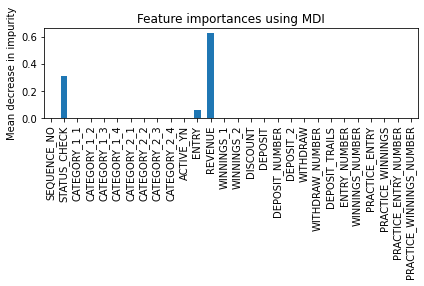

In [47]:
import matplotlib.pyplot as plt
importances= regr1.feature_importances_
forest_importances = pd.Series(importances, index=test.columns[1:29])

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

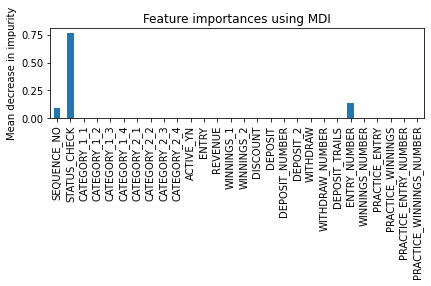

In [48]:
import matplotlib.pyplot as plt
importances= regr2.feature_importances_
forest_importances = pd.Series(importances, index=test.columns[1:29])

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()